In [1]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
os.environ["KERAS_BACKEND"] = "torch"
import keras
from datamodules import data_processors
import sys
print(sys.version)

3.13.1 (main, Dec  9 2024, 00:00:00) [GCC 14.2.1 20240912 (Red Hat 14.2.1-3)]


In [2]:
N_archivos = 12
key_features = "x_"
path_rand = map(lambda x: "../input_data/cubic_" + str(x + 1) + ".csv", range(N_archivos))
datos_rand = [pd.read_csv(x) for x in path_rand]
path_to_current_model = "none" #"models/isotropico_act_custom_6.keras" # colocar "none" si quiere entrenar un modelo

In [3]:
datos_rand[0].head()

,phi_a,x_K,eta,beta,phi_K,eig_0,eig_1,eig_2,eig_3,eig_4,...,eig_13,eig_14,eig_15,eig_16,eig_17,eig_18,eig_19,Parallelepiped,Cylinder,Ellipsoid
0,0.843666,0.647473,1.577259,1.574131,0.866533,0.552390,2.341186,2.982731,4.346947,4.543615,...,10.255629,10.934964,12.169362,12.639375,13.023291,17.260278,18.912029,1,0,0
1,0.618911,0.218057,1.216162,1.820191,1.350973,0.451902,1.069440,2.198825,3.912317,3.934114,...,11.230938,11.241764,11.468446,14.561622,14.919805,15.338283,15.666733,1,0,0
2,0.076877,0.245986,1.434582,2.036289,1.322259,0.104398,3.832743,4.758215,5.732612,5.807000,...,15.088024,15.429422,16.241738,16.394792,20.165109,25.500514,26.305482,1,0,0
3,1.459619,0.517388,1.481719,1.376496,1.027000,0.202136,2.142934,2.641222,2.779140,3.088002,...,10.969815,12.756643,13.922951,14.045571,15.047647,18.770442,19.392401,1,0,0
4,0.032508,0.949501,1.839938,0.803203,0.319154,0.002714,10.061990,13.963490,14.997477,17.405756,...,56.063736,70.470168,72.668095,76.780522,93.416045,97.561829,106.012724,1,0,0


In [4]:
N_eig = 19
features = ["eta", "beta"] + list(map(lambda x: key_features + str(x), range(N_eig + 1)))
target = ["phi_a", "phi_K"]

In [5]:
datos_post = []
for datos in datos_rand:
    datos_post.append(data_processors.preprocess_data(datos, N_eig, target))
#fin for 
datos_rand = datos_post

In [6]:
datos_rand[0].head()

,phi_a,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5,...,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19
0,0.537095,0.551652,0.552390,1.577259,1.574131,0.427134,0.784913,0.686167,0.956716,0.970898,...,0.044254,0.003605,0.062714,0.011232,0.035921,0.065271,0.024853,0.020300,0.224037,0.087339
1,0.394011,0.860056,0.451902,1.216162,1.820191,0.935069,0.486369,0.562026,0.994460,0.833391,...,0.036307,0.021216,0.141992,0.012995,0.000691,0.014469,0.197436,0.022863,0.026711,0.020965
2,0.048942,0.841777,0.104398,1.434582,2.036289,0.260910,0.805500,0.830026,0.987190,0.736554,...,0.024378,0.078955,0.079060,0.006715,0.012978,0.030880,0.005818,0.143328,0.202825,0.030601
3,0.929222,0.653809,0.202136,1.481719,1.376496,0.466650,0.811342,0.950374,0.899980,0.743699,...,0.023561,0.006362,0.055864,0.047249,0.092141,0.060143,0.006323,0.051674,0.191972,0.032072
4,0.020696,0.203180,0.002714,1.839938,0.803203,0.099384,0.720593,0.931056,0.861639,0.698142,...,0.060522,0.001708,0.122370,0.014358,0.135893,0.020733,0.038792,0.156920,0.039106,0.079716


In [7]:
datos_rand[0].keys()

Index(['phi_a', 'phi_K', 'eig_0', 'eta', 'beta', 'eig_1', 'eig_2', 'eig_3',
       'eig_4', 'eig_5', 'eig_6', 'eig_7', 'eig_8', 'eig_9', 'eig_10',
       'eig_11', 'eig_12', 'eig_13', 'eig_14', 'eig_15', 'eig_16', 'eig_17',
       'eig_18', 'eig_19', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6',
       'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15',
       'x_16', 'x_17', 'x_18', 'x_19'],
      dtype='object')

In [8]:
X_rand = [datos_rand[x][features] for x in range(N_archivos)]
y_rand = [datos_rand[x][target] for x in range(N_archivos)]

In [9]:
N_train = 9
X_train = pd.concat((X_rand[i] for i in range(N_train)), axis = 0)
y_train = pd.concat((y_rand[i] for i in range(N_train)), axis = 0)

In [10]:
corr_mat = X_train.select_dtypes(include=['number']).corr()
print(corr_mat)

           eta      beta       x_0       x_1       x_2       x_3       x_4  \
eta   1.000000 -0.000853  0.524443  0.491746  0.394533  0.196712  0.133144   
beta -0.000853  1.000000  0.577020  0.325773  0.163425  0.405151  0.350357   
x_0   0.524443  0.577020  1.000000  0.378696  0.316567  0.357109  0.358901   
x_1   0.491746  0.325773  0.378696  1.000000  0.181614  0.055393  0.052691   
x_2   0.394533  0.163425  0.316567  0.181614  1.000000  0.031942  0.158353   
x_3   0.196712  0.405151  0.357109  0.055393  0.031942  1.000000  0.159821   
x_4   0.133144  0.350357  0.358901  0.052691  0.158353  0.159821  1.000000   
x_5   0.220319  0.011988  0.064497  0.168851  0.164755 -0.042702 -0.100896   
x_6   0.031894  0.250522  0.073587  0.053591  0.114406  0.057257  0.176882   
x_7  -0.000307  0.312899  0.128700  0.062792 -0.003783  0.375783  0.107842   
x_8   0.077542  0.129244  0.104002  0.215692  0.040288  0.079873  0.073740   
x_9  -0.119129  0.020319 -0.066195 -0.042806  0.070492 -0.039948

Text(0.5, 1.0, 'Correlation Matrix')

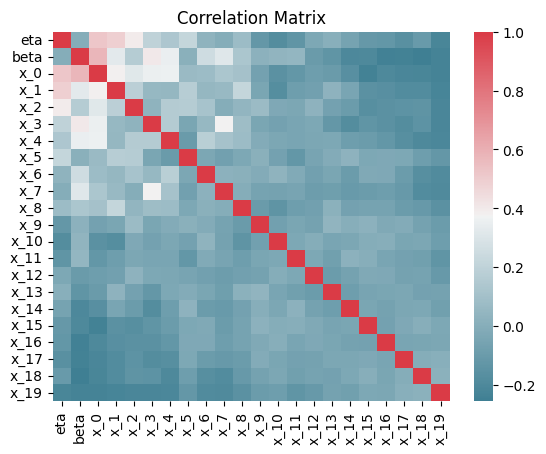

In [11]:
sns.heatmap(corr_mat, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

In [12]:
torch.cuda.get_device_properties(torch.device("cuda"))

_CudaDeviceProperties(name='AMD Radeon RX 6600M', major=10, minor=3, gcnArchName='gfx1030', total_memory=8176MB, multi_processor_count=14, uuid=58580000-0000-0000-0000-000000000000, L2_cache_size=2MB)

In [13]:
def crear_modelo_de_regresion(lr_var, n_input_data, def_act = 'relu'):    
    modelo = keras.models.Sequential()
    modelo.add(keras.layers.Dense(256, activation = def_act, input_shape = (n_input_data,)))
    modelo.add(keras.layers.Dense(1024, activation = def_act))
    modelo.add(keras.layers.Dense(1400, activation = def_act))
    modelo.add(keras.layers.Dense(2490, activation = def_act))
    modelo.add(keras.layers.Dense(4872, activation = def_act))
    modelo.add(keras.layers.Dense(3304, activation = def_act))
    modelo.add(keras.layers.Dense(1974, activation = def_act))
    modelo.add(keras.layers.Dense(1542, activation = def_act))
    modelo.add(keras.layers.Dense(724, activation = def_act))
    modelo.add(keras.layers.Dense(256, activation = def_act))
    modelo.add(keras.layers.Dense(32, activation = def_act))
    modelo.add(keras.layers.Dense(2, activation = 'hard_sigmoid'))
    modelo.compile(optimizer = keras.optimizers.Adam(learning_rate = lr_var), loss = 'mse', metrics = ['mae']) #RMSprop
    return modelo

In [14]:
X_val = pd.concat((X_rand[i] for i in range(N_train, N_train + 2)), axis = 0)
y_val = pd.concat((y_rand[i] for i in range(N_train, N_train + 2)), axis = 0)

In [15]:
epocas = 25
nombre_modelo = "cubico_L2.keras"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    "models/" + nombre_modelo,  
    save_best_only=True,
    save_weights_only=False, 
)

In [16]:
if path_to_current_model == "none":
    path_model = "models/" + nombre_modelo
    try:
        modelo = keras.models.load_model(path_model)
    except: 
        modelo = crear_modelo_de_regresion(0.0005, len(features))
    #fin exception
    history = modelo.fit(X_train, y_train, epochs = epocas, batch_size=64, 
                            validation_data = (X_val, y_val), callbacks=[checkpoint_callback])
else:
    modelo = keras.models.load_model(path_to_current_model)
#fin if 

Epoch 1/25


/home/cubos/.local/lib/python3.13/site-packages/keras/src/backend/torch/numpy.py:114: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:328.)
  return cast(torch.matmul(x1, x2), result_dtype)


7031/7031 ━━━━━━━━━━━━━━━━━━━━ 279s 40ms/step - loss: 0.0152 - mae: 0.0800 - val_loss: 0.0142 - val_mae: 0.0756
Epoch 2/25
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 279s 40ms/step - loss: 0.0143 - mae: 0.0765 - val_loss: 0.0142 - val_mae: 0.0765
Epoch 3/25
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 280s 40ms/step - loss: 0.0132 - mae: 0.0726 - val_loss: 0.0125 - val_mae: 0.0700
Epoch 4/25
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 279s 40ms/step - loss: 0.0125 - mae: 0.0699 - val_loss: 0.0135 - val_mae: 0.0739
Epoch 5/25
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 280s 40ms/step - loss: 0.0120 - mae: 0.0680 - val_loss: 0.0122 - val_mae: 0.0678
Epoch 6/25
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 280s 40ms/step - loss: 0.0115 - mae: 0.0660 - val_loss: 0.0114 - val_mae: 0.0654
Epoch 7/25
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 279s 40ms/step - loss: 0.0109 - mae: 0.0637 - val_loss: 0.0115 - val_mae: 0.0647
Epoch 8/25
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 279s 40ms/step - loss: 0.0106 - mae: 0.0625 - val_loss: 0.0101 - val_mae: 0.0598
Epoch 9/25
7031/7031 ━━━━━━

In [17]:
mets_train = data_processors.get_metrics(X_train, y_train, modelo)
mets_val = data_processors.get_metrics(X_rand[N_train], y_rand[N_train], modelo)
mets_rand1 = data_processors.get_metrics(X_rand[N_train + 2], y_rand[N_train + 2], modelo)

14061/14061 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


In [18]:
print("Train: ", mets_train)
print("Val: ", mets_val)
print("Test: ", mets_rand1)

Train:  {'R2': 0.8972821235656738, 'RMSE': 0.07145437598228455, 'MAE': 0.04356973245739937, 'SDAE': np.float64(0.23058034814093123)}
Val:  {'R2': 0.8757991194725037, 'RMSE': 0.07945823669433594, 'MAE': 0.0472862534224987, 'SDAE': np.float64(0.23015337551300416)}
Test:  {'R2': 0.8757209777832031, 'RMSE': 0.07937642931938171, 'MAE': 0.04735666513442993, 'SDAE': np.float64(0.22982964219487148)}


In [19]:
if path_to_current_model == "none":
    modelo.save("models/" + nombre_modelo)
#fin if 

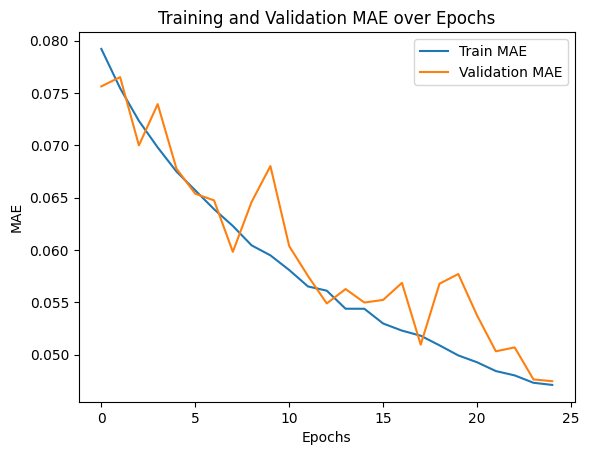

In [20]:
if path_to_current_model == "none":
    train_mae = history.history["mae"]
    val_mae = history.history["val_mae"]
    plt.figure()
    plt.plot(train_mae, label='Train MAE')
    plt.plot(val_mae, label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('Training and Validation MAE over Epochs')
    plt.legend()

In [21]:
if path_to_current_model == "none":
    import json
    with open('models/' + nombre_modelo[:-6] +'history.json', 'w') as f:
        json.dump(history.history, f)